<a href="https://colab.research.google.com/github/anshuman-8/Loan-Prediction/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Approval Prediction


Importing all modules

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
%matplotlib inline
from sklearn.metrics import mean_squared_error

Getting and displaying Dataset

In [51]:
Loan_data = pd.read_csv("/content/df1_loan.csv")
# Loan_data=datasets.loan_dataset.csv
Loan_data.head()
Loan_data.shape

(500, 15)

In [52]:
print(Loan_data.keys())

Index(['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income'],
      dtype='object')


Columns with number of empty cells

In [53]:
Loan_data.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

In [54]:
Loan_data['LoanAmount'] = Loan_data['LoanAmount'].fillna(Loan_data['LoanAmount'].mean())
Loan_data['Loan_Amount_Term'] = Loan_data['Loan_Amount_Term'].fillna(Loan_data['Loan_Amount_Term'].mean())
Loan_data['Credit_History'] = Loan_data['Credit_History'].fillna(Loan_data['Credit_History'].mean())

In [55]:
Loan_data['Gender'] = Loan_data["Gender"].fillna(Loan_data['Gender'].mode()[0])
Loan_data['Married'] = Loan_data["Married"].fillna(Loan_data['Married'].mode()[0])
Loan_data['Dependents'] = Loan_data["Dependents"].fillna(Loan_data['Dependents'].mode()[0])
Loan_data['Self_Employed'] = Loan_data["Self_Employed"].fillna(Loan_data['Self_Employed'].mode()[0])

In [56]:
Loan_data.isnull().sum()

Unnamed: 0           0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

In [57]:
Loan_data['Total_Income'] = Loan_data['ApplicantIncome'] + Loan_data['CoapplicantIncome']


In [58]:
Loan_data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,144.020747,360.0,1.0,Urban,Y,5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


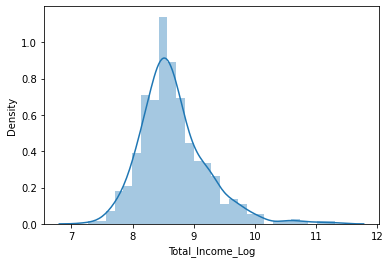

In [59]:
Loan_data['Total_Income_Log'] = np.log(Loan_data['Total_Income']+1)
sns.distplot(Loan_data["Total_Income_Log"])



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


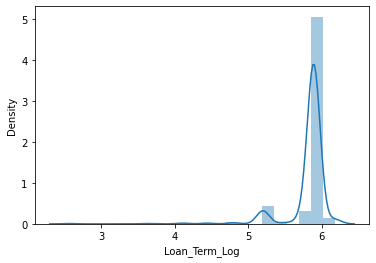

In [60]:
Loan_data['Loan_Term_Log'] = np.log(Loan_data['Loan_Amount_Term']+1)
sns.distplot(Loan_data["Loan_Term_Log"])


In [61]:
col=['Loan_ID','ApplicantIncome','CoapplicantIncome']
for c in col:
  del Loan_data[c]

from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Dependents"]
le = LabelEncoder()
for col in cols:
    Loan_data[col] = le.fit_transform(Loan_data[col])
print(Loan_data.head(10))

   Unnamed: 0  Gender  Married  ...  Total_Income  Total_Income_Log  Loan_Term_Log
0           0       1        0  ...        5849.0          8.674197       5.888878
1           1       1        1  ...        6091.0          8.714732       5.888878
2           2       1        1  ...        3000.0          8.006701       5.888878
3           3       1        1  ...        4941.0          8.505525       5.888878
4           4       1        0  ...        6000.0          8.699681       5.888878
5           5       1        1  ...        9613.0          9.170976       5.888878
6           6       1        1  ...        3849.0          8.255828       5.888878
7           7       1        1  ...        5540.0          8.619930       5.888878
8           8       1        1  ...        5532.0          8.618485       5.888878
9           9       1        1  ...       23809.0         10.077861       5.888878

[10 rows x 14 columns]


### Hypothesis
  f(x<sub>1</sub>, x<sub>2</sub>, x<sub>3</sub>, x<sub>4</sub>, x<sub>5</sub>) = w<sub>0</sub> + w<sub>1</sub>x<sub>1</sub>+ w<sub>2</sub>x<sub>2</sub>+ w<sub>3</sub>x<sub>3</sub>+ w<sub>4</sub>4<sub>0</sub>+ w<sub>5</sub>x<sub>5</sub>+ w<sub>6</sub>x<sub>6</sub>+ w<sub>7</sub>x<sub>7</sub>





In [62]:
data_X,data_Y=Loan_data[['Total_Income_Log','Gender','Married','Dependents','Education','Self_Employed',"Property_Area","Credit_History","Loan_Term_Log"]].values , Loan_data['LoanAmount'].values
# .

In [63]:
model=linear_model.LinearRegression()
model.fit(data_X,data_Y)

LinearRegression()

In [64]:
acc= model.score(data_X,data_Y)*100
print(acc)


49.1556488597279


In [65]:
print("Weights: ",model.coef_)
print("Intercepts: ",model.intercept_)
wt=list(model.coef_)
print(wt)
wt=[model.intercept_]+wt
print(wt)
wt=np.array([wt])
print(wt)
print(wt.shape)

Weights:  [ 1.02140699e+02 -1.92167509e+00 -9.52745107e-01  7.73295008e+00
 -4.48479105e+00 -1.19311697e+01  8.92397093e-02 -5.08396955e+00
  1.60767944e+01]
Intercepts:  -830.9574271515453
[102.14069941167307, -1.9216750857540066, -0.952745106676447, 7.732950078339861, -4.484791051451648, -11.931169705927736, 0.08923970926891084, -5.083969553500984, 16.076794350923052]
[-830.9574271515453, 102.14069941167307, -1.9216750857540066, -0.952745106676447, 7.732950078339861, -4.484791051451648, -11.931169705927736, 0.08923970926891084, -5.083969553500984, 16.076794350923052]
[[-8.30957427e+02  1.02140699e+02 -1.92167509e+00 -9.52745107e-01
   7.73295008e+00 -4.48479105e+00 -1.19311697e+01  8.92397093e-02
  -5.08396955e+00  1.60767944e+01]]
(1, 10)


In [66]:
# plt.scatter(data_X.reshape(-1, 1),data_Y.reshape(-1, 1))
# plt.plot(data_X.reshape(-1,1),pridicted_Y)
# plt.show()
income=int(input("Enter Total income: "))
income=np.log(income+1)
g=int(input("Enter Gender(1-> Male ;0-> Female ): "))
m=int(input("Enter if Married (1-> yes ;0-> No): "))
d=int(input("Enter number of dependents: "))
e=int(input("Enter if educated(0-> graduated ; 1 -> not-graduated): "))
se=int(input("Enter if self emplyed (1-> yes ;0-> No): "))
p=int(input("Emter residence type(0-> Rural ;1->semiurban ;2-> Urban ): "))
c=int(input("Enter Credit history (1-> yes ; 0-> no): "))
lt=int(input("Enter Loan term amount (number of days): "))
lt=np.log(lt+1)
var=np.array([1,income,g,m,d,e,se,p,c,lt])
print(var.shape)
print(var)

KeyboardInterrupt: ignored

In [ ]:
print(np.matmul(wt,var))

reference: https://medium.com/analytics-vidhya/simple-linear-regression-with-example-using-numpy-e7b984f0d15e

https://github.com/ParthS007/Loan-Approval-Prediction/issues